In [287]:
import numpy as np 
import pandas as pd 
import nltk.corpus
import re
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt 
%inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\999sb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\999sb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
UsageError: Line magic function `%inline` not found.


In [358]:
from sklearn import  set_config
set_config(display = 'diagram')

In [288]:
df_NewsDjia = pd.read_csv('News_DJIA.csv', delimiter=',')

In [289]:
df_NewsDjia.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [290]:
df_RedditNews = pd.read_csv('News_reddit.csv', delimiter=',')
df_DjiaStock = pd.read_csv('DJIA_t.csv',delimiter=',')

In [291]:
df_DjiaStock.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [292]:
df_RedditNews.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [293]:
df_NewsDjia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   int64 
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

In [294]:
for i in df_NewsDjia.columns :
    df_NewsDjia[i] = df_NewsDjia[i].astype(str)

In [295]:
df_NewsDjia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1989 non-null   object
 1   Label   1989 non-null   object
 2   Top1    1989 non-null   object
 3   Top2    1989 non-null   object
 4   Top3    1989 non-null   object
 5   Top4    1989 non-null   object
 6   Top5    1989 non-null   object
 7   Top6    1989 non-null   object
 8   Top7    1989 non-null   object
 9   Top8    1989 non-null   object
 10  Top9    1989 non-null   object
 11  Top10   1989 non-null   object
 12  Top11   1989 non-null   object
 13  Top12   1989 non-null   object
 14  Top13   1989 non-null   object
 15  Top14   1989 non-null   object
 16  Top15   1989 non-null   object
 17  Top16   1989 non-null   object
 18  Top17   1989 non-null   object
 19  Top18   1989 non-null   object
 20  Top19   1989 non-null   object
 21  Top20   1989 non-null   object
 22  Top21   1989 non-null   

In [296]:
num_columns = df_NewsDjia.columns.shape[0]
col_names = df_NewsDjia.columns.values.tolist()
df_NewsDjia.loc[:, 'merged'] = ""
for each_col_ind in range(num_columns):
    df_NewsDjia.loc[:, 'merged'] =  df_NewsDjia.loc[:, 'merged'] + " " + df_NewsDjia[col_names[each_col_ind]] + " "

In [297]:
df_NewsDjia['merged']

0        2008-08-08  0  b"Georgia 'downs two Russian w...
1        2008-08-11  1  b'Why wont America and Nato he...
2        2008-08-12  0  b'Remember that adorable 9-yea...
3        2008-08-13  0  b' U.S. refuses Israel weapons...
4        2008-08-14  1  b'All the experts admit that w...
                              ...                        
1984     2016-06-27  0  Barclays and RBS shares suspen...
1985     2016-06-28  1  2,500 Scientists To Australia:...
1986     2016-06-29  1  Explosion At Airport In Istanb...
1987     2016-06-30  1  Jamaica proposes marijuana dis...
1988     2016-07-01  1  A 117-year-old woman in Mexico...
Name: merged, Length: 1989, dtype: object

In [298]:
df_NewsDjia.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'merged'],
      dtype='object')

In [299]:
df_finalised = df_NewsDjia[['Date','merged']]

In [300]:
df_finalised.iloc[0][1]

' 2008-08-08  0  b"Georgia \'downs two Russian warplanes\' as countries move to brink of war"  b\'BREAKING: Musharraf to be impeached.\'  b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\'  b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\'  b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing"  b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\'  b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side"  b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it."  b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\'  b\'Did the U.S. Prep Georg

In [301]:
date_numric_stopwords = "THOUSAND MILLION BILLION TRILLION HUNDRED ANNUAL ANNUALLY ANNUM YEAR YEARLY QUARTER QUARTERLY QTR MONTH MONTHLY WEEK WEEKLY DAY DAILY JANUARY FEBRUARY MARCH APRIL MAY JUNE JULY AUGUST SEPTEMBER OCTOBER NOVEMBER DECEMBER JAN FEB MAR APR MAY JUN JUL AUG SEP SEPT OCT NOV DEC MONDAY TUESDAY WEDNESDAY THURSDAY FRIDAY SATURDAY SUNDAY TWO THREE FOUR FIVE SIX SEVEN EIGHT NINE TEN ELEVEN TWELVE THIRTEEN FOURTEEN FIFTEEN SIXTEEN SEVENTEEN EIGHTEEN NINETEEN TWENTY THIRTY FORTY FIFTY SIXTY SEVENTY EIGHTY NINETY FIRST SECOND THIRD FOURTH FIFTH SIXTH SEVENTH EIGHTH NINTH TENTH II III IV V VI VII VIII IX X XI XII XIII XIV XV XVI XVII XVIII XIX XX"
date_numric_stopwords = date_numric_stopwords.lower()
date_numric_stopwords = date_numric_stopwords.split(" ")

In [302]:

def remove_unecssary_word(sent):
    sent = sent.replace("b'",'')
    sent = sent.replace('b"','')
    sent = sent.lower()
    sent = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", sent)
    stop = stopwords.words('english')
    stop.extend(date_numric_stopwords)
    sent = " ".join([word for word in sent.split() if word not in (stop)])
    sent = " ".join([WordNetLemmatizer().lemmatize(word) for word in sent.split() ])
    return sent

In [303]:
df_finalised['merged'] = df_finalised['merged'].apply(remove_unecssary_word)

C:\Users\999sb\AppData\Local\Temp\ipykernel_10196\4213319948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finalised['merged'] = df_finalised['merged'].apply(remove_unecssary_word)


In [304]:
df_finalised['merged']

0       20080808 0 georgia down russian warplane count...
1       20080811 1 wont america nato help u wont help ...
2       20080812 0 remember adorable 9yearold sang ope...
3       20080813 0 u refuse israel weapon attack iran ...
4       20080814 1 expert admit legalise drug war sout...
                              ...                        
1984    20160627 0 barclays rb share suspended trading...
1985    20160628 1 2500 scientist australia want save ...
1986    20160629 1 explosion airport istanbul yemeni f...
1987    20160630 1 jamaica proposes marijuana dispense...
1988    20160701 1 117yearold woman mexico city finall...
Name: merged, Length: 1989, dtype: object

In [305]:
df_finalised.iloc[0][1]

'20080808 0 georgia down russian warplane country move brink war breaking musharraf impeached russia today column troop roll south ossetia footage fighting youtube russian tank moving towards capital south ossetia reportedly completely destroyed georgian artillery fire afghan child raped impunity un official say sick old raped nothing 150 russian tank entered south ossetia whilst georgia shoot russian jet breaking georgia invades south ossetia russia warned would intervene so side enemy combatent trial nothing sham salim haman sentenced 5 12 year kept longer anyway feel like georgian troop retreat osettain capital presumably leaving several people killed video u prep georgia war russia rice give green light israel attack iran say u veto israeli military ops announcingclass action lawsuit behalf american public fbi sorussia georgia war nyts top story opening ceremony olympics fucking disgrace yet proof decline journalism china tell bush stay country affair world war start today georgia 

In [306]:
df_finalised = pd.concat([df_finalised,df_NewsDjia['Label']],axis = 1)

In [307]:
df_finalised

,Date,merged,Label
0,2008-08-08,20080808 0 georgia down russian warplane count...,0
1,2008-08-11,20080811 1 wont america nato help u wont help ...,1
2,2008-08-12,20080812 0 remember adorable 9yearold sang ope...,0
3,2008-08-13,20080813 0 u refuse israel weapon attack iran ...,0
4,2008-08-14,20080814 1 expert admit legalise drug war sout...,1
...,...,...,...
1984,2016-06-27,20160627 0 barclays rb share suspended trading...,0
1985,2016-06-28,20160628 1 2500 scientist australia want save ...,1
1986,2016-06-29,20160629 1 explosion airport istanbul yemeni f...,1
1987,2016-06-30,20160630 1 jamaica proposes marijuana dispense...,1


In [308]:
Positive_word = ""
with open('Positive_words.txt', 'r') as file:
    Positive_word = file.read().replace('\n', '')

In [309]:
Positive_word = " ".join([WordNetLemmatizer().lemmatize(word) for word in Positive_word.split(',') ])

In [310]:
Negative_word = ""
with open('Negative_words.txt','r') as file:
    Negative_word = file.read().replace('\n','')

In [311]:
Negative_word = " ".join([WordNetLemmatizer().lemmatize(word) for word in Negative_word.split(',') ])

In [312]:
Positive_word = Positive_word.split(',')

In [313]:
Negative_word = Negative_word.split(',')

In [314]:
Positive_word

['a+ abound abounds abundance abundant accessable accessible acclaim acclaimed acclamation accolade accolade accommodative accomodative accomplish accomplished accomplishment accomplishment accurate accurately achievable achievement achievement achievible acumen adaptable adaptive adequate adjustable admirable admirably admiration admire admirer admiring admiringly adorable adore adored adorer adoring adoringly adroit adroitly adulate adulation adulatory advanced advantage advantageous advantageously advantage adventuresome adventurous advocate advocated advocate affability affable affably affectation affection affectionate affinity affirm affirmation affirmative affluence affluent afford affordable affordably afordable agile agilely agility agreeable agreeableness agreeably allaround alluring alluringly altruistic altruistically amaze amazed amazement amazes amazing amazingly ambitious ambitiously ameliorate amenable amenity amiability amiabily amiable amicability amicable amicably am

In [315]:
Negative_word

['abnormal abolish abominable abominably abominate abomination abort aborted abort abrade abrasive abrupt abruptly abscond absence absent-minded absentee absurd absurdity absurdly absurdness abuse abused abuse abusive abysmal abysmally abyss accidental accost accursed accusation accusation accuse accuses accusing accusingly acerbate acerbic acerbically ache ached ache achey aching acrid acridly acridness acrimonious acrimoniously acrimony adamant adamantly addict addicted addicting addict admonish admonisher admonishingly admonishment admonition adulterate adulterated adulteration adulterier adversarial adversary adverse adversity afflict affliction afflictive affront afraid aggravate aggravating aggravation aggression aggressive aggressiveness aggressor aggrieve aggrieved aggrivation aghast agony agonize agonizing agonizingly agony aground ail ailing ailment aimless alarm alarmed alarming alarmingly alienate alienated alienation allegation allegation allege allergic allergy allergy al

In [316]:
Negative_word = Negative_word[0].split()
Positive_word = Positive_word[0].split()

In [317]:
Negative_word

['abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'abort',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuse',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusation',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'ache',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addict',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',
 'afraid',
 'aggravate',
 'ag

In [318]:
if 'down' in df_finalised.iloc[0][1].split():
    print("k")

k


In [319]:
set_neg

{'backwardness',
 'breach',
 'emphatically',
 'idiotic',
 'reluctantly',
 'refusal',
 'enviously',
 'dislike',
 'regression',
 'uncompetitive',
 'shemale',
 'jeering',
 'unsteady',
 'impossible',
 'bizarre',
 'plot',
 'brazenness',
 'anarchy',
 'fearsome',
 'delinquent',
 'insolent',
 'powerless',
 'ricer',
 'anti-white',
 'hateful',
 'boring',
 'groundless',
 'stark',
 'unspeakablely',
 'disregard',
 'notorious',
 'reluctant',
 'negativity',
 'risky',
 'disgustedly',
 'temerity',
 'calumnious',
 'obtrusive',
 'ashamed',
 'poky',
 'adamantly',
 'rift',
 'wretched',
 'grating',
 'disavow',
 'extraneous',
 'hissing',
 'lunaticism',
 'beset',
 'castigate',
 'trivialize',
 'prattle',
 'ranted',
 'vagrant',
 'oversight',
 'over-hyped',
 'unsophisticated',
 'decrement',
 'longing',
 'severity',
 'susceptible',
 'demonize',
 'alarm',
 'immodest',
 'bellicose',
 'noise',
 'curse',
 'disdained',
 'revulsive',
 'scaly',
 'doom',
 'ruin',
 'fall',
 'despondently',
 'bribery',
 'rage',
 'inadequac

In [320]:
set_post = set(Positive_word)
set_neg = set(Negative_word)
def Count(obj):
    count_post = 1
    count_neg = 1
    obj = obj.split()
    for i in obj:
        if i in set_post:
            count_post = count_post + 1
        elif i in set_neg:
            count_neg = count_neg + 1
    return count_post/count_neg


In [321]:
df_finalised['ratio_pos_neg'] = df_finalised['merged'].apply(Count)

In [356]:
# df = df_finalised[df_finalised['ratio_pos_neg']<0.2]

In [323]:
df_finalised.head()

,Date,merged,Label,ratio_pos_neg
0,2008-08-08,20080808 0 georgia down russian warplane count...,0,0.222222
1,2008-08-11,20080811 1 wont america nato help u wont help ...,1,0.692308
2,2008-08-12,20080812 0 remember adorable 9yearold sang ope...,0,0.785714
3,2008-08-13,20080813 0 u refuse israel weapon attack iran ...,0,0.444444
4,2008-08-14,20080814 1 expert admit legalise drug war sout...,1,0.388889


In [324]:
X_data = df_finalised['merged']

In [325]:
tf_idf = TfidfVectorizer(ngram_range=(1,4), max_features=1000)
X_tf = tf_idf.fit_transform(X_data)
X_tf = tf_idf.transform(X_data)

In [326]:
X_tf.shape

(1989, 1000)

In [327]:
X_data = X_tf.toarray()
X_data = np.array(X_data)

In [328]:
ratio_column = df_finalised['ratio_pos_neg']
ratio_column = np.array(ratio_column).reshape((-1,1))

In [329]:
ratio_column.shape

(1989, 1)

In [330]:
X_data = np.append(X_data,ratio_column,axis = 1)

In [331]:
X_data

array([[0.        , 0.        , 0.06246414, ..., 0.        , 0.        ,
        0.22222222],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.69230769],
       [0.        , 0.05501392, 0.        , ..., 0.        , 0.        ,
        0.78571429],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.3125    ],
       [0.        , 0.06457299, 0.        , ..., 0.        , 0.        ,
        0.35714286],
       [0.        , 0.06896645, 0.        , ..., 0.        , 0.        ,
        0.19512195]])

In [332]:
Y_data = df_finalised['Label']

In [333]:
Y_data = np.array(Y_data).reshape((-1,1))

In [334]:
Y_data

array([['0'],
       ['1'],
       ['0'],
       ...,
       ['1'],
       ['1'],
       ['1']], dtype=object)

In [335]:
x_train , x_test , y_train, y_test = train_test_split(X_data,Y_data,test_size=0.2,random_state=1)

In [336]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_stand = scaler.transform(x_train)
x_test_stand = scaler.transform(x_test)

In [337]:
pca = PCA()

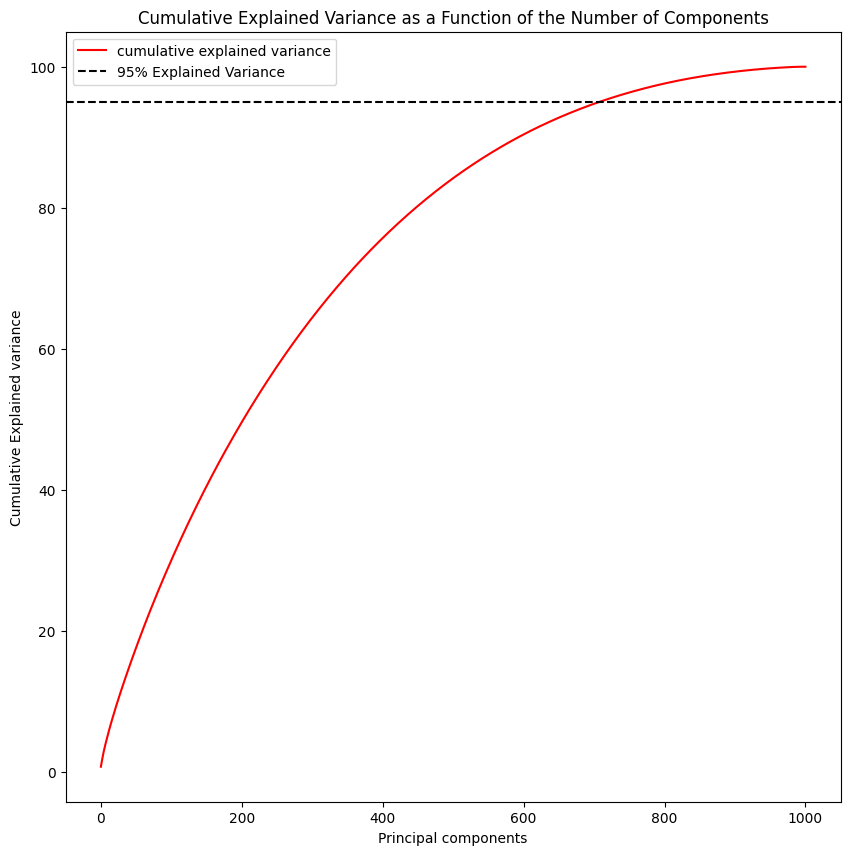

In [338]:
pca.fit(x_train_stand)
cumsum = np.cumsum(pca.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')

In [339]:
# VARIANCE EXPLAINED 90%
pca = PCA(.90) 
pca.fit(x_train_stand)
x_train_pca = pca.transform(x_train_stand)
test_pca = pca.transform(x_test_stand)

In [340]:
x_train_pca.shape

(1591, 594)